<a href="https://colab.research.google.com/github/kaapivalli/Machine-Learning/blob/main/wine_quality_classification_using__ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READING CSV INTO DATA FRAME

In [ ]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**CHECKING THE CHARACTERISTICS OF DATA**

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

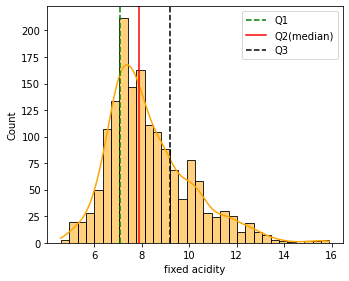

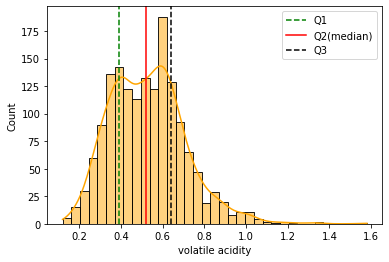

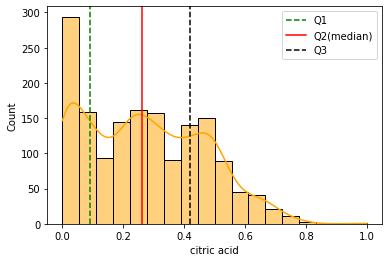

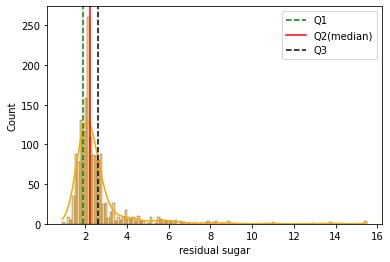

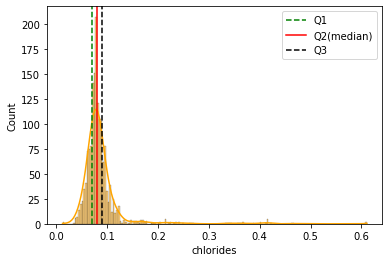

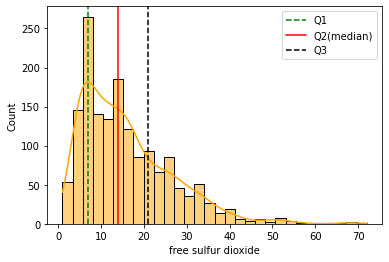

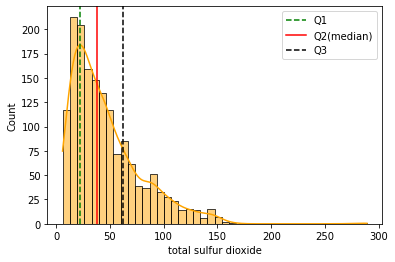

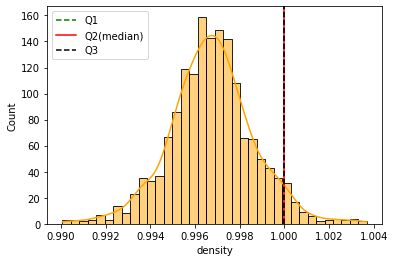

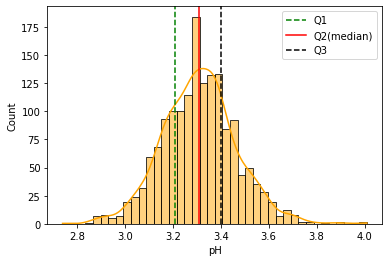

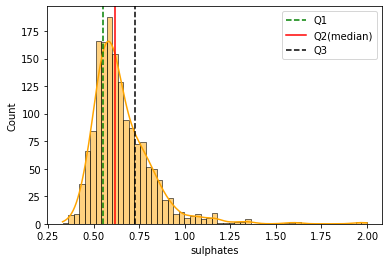

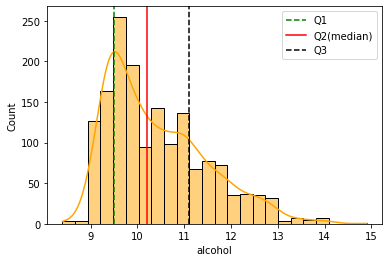

In [ ]:
# exploratory data analysis
features=df.columns[:-1]
def get_percentile(feature,q_range):
    dist=df[feature].describe()[str(q_range)+'%']
    return round(dist,2)
def render_counterplot():
    fig=plt.figure(figsize=(18,20))
    for column, feature in enumerate(features):
        fig.add_subplot(4,3,column+1)
        q1=get_percentile(feature,25)
        q2=get_percentile(feature,50)
        q3=get_percentile(feature,75)
        sns.histplot(data=df,x=feature,kde=True,color='orange')
        plt.axvline(q1,linestyle='--',color='green',label='Q1')
        plt.axvline(q2,color='red',label='Q2(median)')
        plt.axvline(q3,linestyle='--',color='black',label='Q3')
        plt.legend()
        plt.show()
render_counterplot()


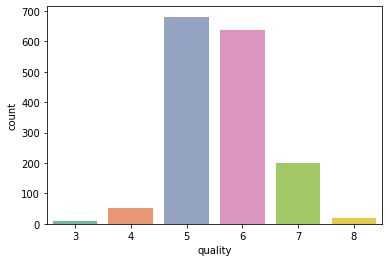

In [ ]:
sns.countplot(data=df,x='quality',palette='Set2')

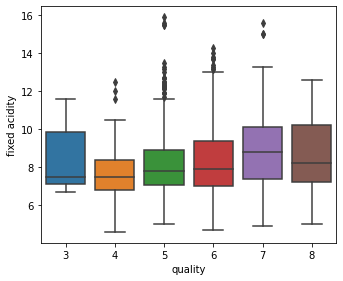

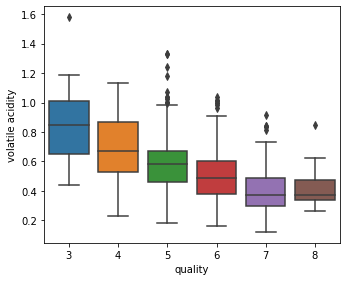

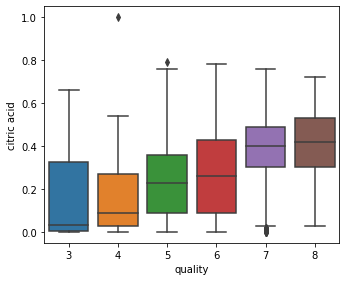

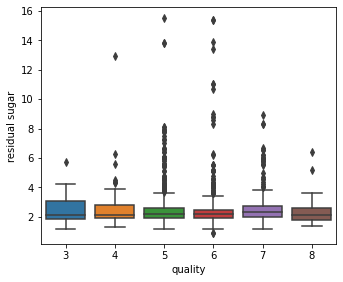

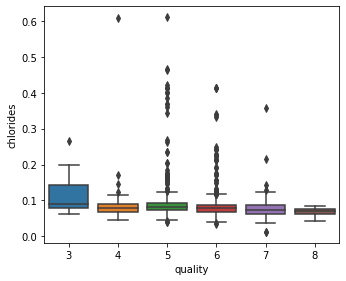

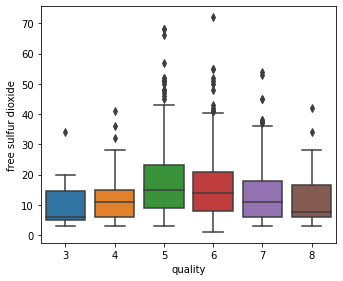

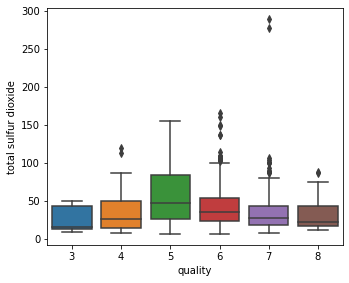

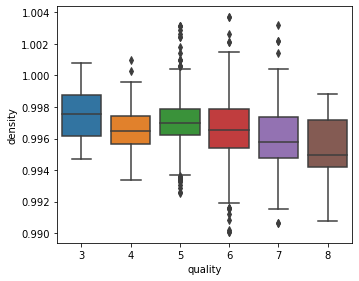

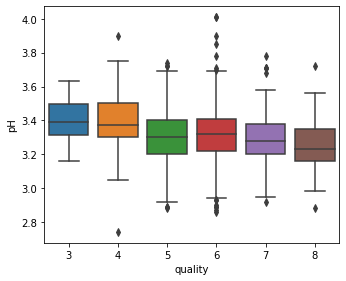

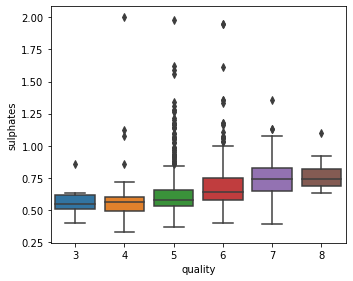

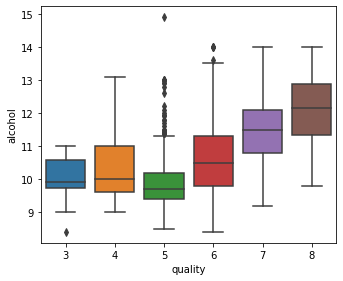

In [ ]:
def boxplo(feature):
    sns.boxplot(x='quality',y=feature,data=df)
    plt.show()
for x in df.columns[:-1]:
    i=1
    fig=plt.figure(figsize=(18,20))
    fig.add_subplot(4,3,i)
    boxplo(x)
    i=i+1

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# some features are highly skewed.. skewness is one of the reasons for more outliers.
# 5 and 6 have more data ( quality) that's why more of outliers appear in them

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop('quality',axis=1)
y=df['quality']

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# STANDARDIZING DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
x[x.columns]=sc.fit_transform(x[x.columns])

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


# CHECKING FOR MULTICOLLINEARITY

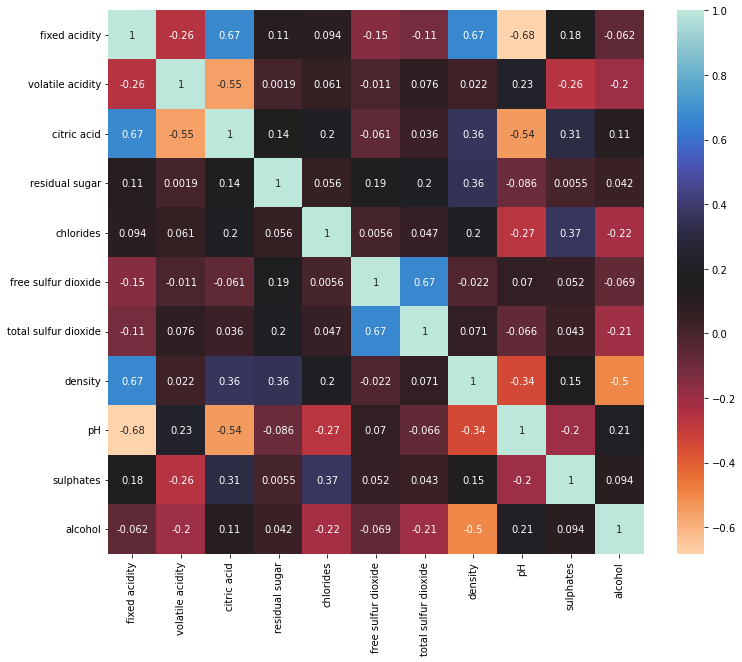

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data=x.corr(),cmap='icefire_r',annot=True)

In [ ]:
# not high correlation found between independent vars.. only max till +/- 0.60 (approx)..
#So, we conclude there isn't any significant multicorrelation between independent variables
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# HANDLING IMBALANCES IN THE DATA

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
smote=SMOTE()
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

# TRAIN_TEST_SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

# IMPORTING LIBRARIES FOR BUILDING AN ANN MODEL

In [ ]:
!pip install tensorflow
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.layers import Dropout

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# NEURAL NETWORK MODEL BUILDING

In [ ]:
model=Sequential()
model.add(tensorflow.keras.layers.Input(shape=11,))
model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))  #we lose some of info (30%) so as to avoid overfitting
model.add(tensorflow.keras.layers.Dense(128,activation='relu')) # we add another hidden layer with 128 neurons
model.add(tensorflow.keras.layers.Dense(6,activation='softmax')) # since softmax & sigmoid can be used for o/p layers
# in classification problems.This will be taken as last layer

# ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [ ]:
y_train=pd.DataFrame(y_train.reshape(len(y_train),1))
y_test=pd.DataFrame(y_test.reshape(len(y_test),1))
y_train

,0
0,0
1,1
2,1
3,0
4,2
...,...
3263,3
3264,3
3265,2
3266,5


In [ ]:
y_train=tensorflow.keras.utils.to_categorical(y_train,6)
y_test=tensorflow.keras.utils.to_categorical(y_test,6)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# optimizer is for backpropagation.. it gets initiated on how much the loss has occurred and each time
# after optimized, again loss is calculated for the newly optimized model
# the metric we need is accuracy

In [ ]:
model.fit(x_train,y_train,epochs=400,verbose=1)
#

Epoch 1/400
103/103 [==============================] - 2s 4ms/step - loss: 1.4201 - accuracy: 0.4143
Epoch 2/400
103/103 [==============================] - 0s 4ms/step - loss: 1.0856 - accuracy: 0.5428
Epoch 3/400
103/103 [==============================] - 0s 4ms/step - loss: 0.9612 - accuracy: 0.6034
Epoch 4/400
103/103 [==============================] - 0s 3ms/step - loss: 0.8872 - accuracy: 0.6386
Epoch 5/400
103/103 [==============================] - 0s 3ms/step - loss: 0.8315 - accuracy: 0.6744
Epoch 6/400
103/103 [==============================] - 0s 3ms/step - loss: 0.7961 - accuracy: 0.6778
Epoch 7/400
103/103 [==============================] - 0s 2ms/step - loss: 0.7563 - accuracy: 0.7041
Epoch 8/400
103/103 [==============================] - 0s 2ms/step - loss: 0.7219 - accuracy: 0.7096
Epoch 9/400
103/103 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.7246
Epoch 10/400
103/103 [==============================] - 0s 2ms/step - loss: 0.6759 - accura

In [ ]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

# MODEL PREDICTING...

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([[3.6075256e-17, 2.7585097e-06, 9.1135073e-01, 8.8644348e-02,
        2.1338565e-06, 1.7907966e-29],
       [3.1489617e-26, 1.9971099e-18, 9.0756178e-01, 9.2438169e-02,
        3.6722300e-15, 8.3263950e-35],
       [3.7099164e-21, 2.8977401e-29, 7.6517659e-05, 6.8019979e-02,
        9.3190354e-01, 3.7330631e-25],
       ...,
       [9.9991620e-01, 4.9195510e-09, 8.3744344e-05, 5.5178405e-12,
        1.3269720e-12, 0.0000000e+00],
       [4.7468375e-17, 9.9999976e-01, 2.7848603e-07, 4.2206933e-13,
        5.5505705e-31, 3.3611293e-36],
       [3.0294884e-27, 7.2943373e-26, 9.8827565e-01, 1.1724417e-02,
        1.2431126e-15, 2.8538692e-25]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([2, 2, 4, 4, 1, 1, 2, 4, 2, 2, 5, 4, 2, 0, 5, 2, 2, 3, 5, 1, 3, 0,
       2, 3, 3, 0, 3, 0, 3, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       3, 1, 4, 3, 1, 5, 4, 3, 2, 3, 2, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 3, 3, 2, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 1, 4, 5, 5, 1, 5, 2, 2, 3, 1, 2, 0, 4, 4,
       2, 1, 4, 3, 2, 2, 0, 5, 1, 2, 2, 3, 4, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 2, 0, 4, 2, 2, 3, 4, 5, 4, 4, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 4,
       1, 0, 3, 1, 1, 3, 5, 5, 4, 4, 2, 4, 3, 4, 4, 3, 3, 4, 3, 1, 1, 0,
       2, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 3, 2, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 2, 3, 1, 3, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 2, 4, 0, 5, 2, 5, 2, 4, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [ ]:
y_test=np.argmax(y_test,axis=1)
y_test

array([3, 2, 4, 4, 1, 1, 2, 3, 2, 3, 5, 4, 2, 0, 5, 3, 2, 2, 5, 1, 3, 0,
       2, 3, 1, 0, 3, 0, 2, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 2, 4, 2, 1, 5, 3, 3, 2, 3, 3, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 2, 3, 3, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 3, 4, 5, 5, 1, 5, 2, 2, 3, 1, 3, 0, 4, 4,
       3, 1, 4, 3, 2, 3, 0, 5, 1, 2, 2, 2, 3, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 3, 0, 4, 2, 3, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 3,
       3, 0, 3, 1, 1, 2, 5, 5, 4, 4, 2, 4, 2, 4, 2, 3, 2, 4, 3, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 2, 3, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 3, 1, 2, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 3, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

# CALCULATING MODEL'S ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

87.53056234718827

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       136
           1       0.96      0.96      0.96       131
           2       0.78      0.75      0.76       156
           3       0.63      0.77      0.70       127
           4       0.95      0.82      0.88       134
           5       0.99      0.99      0.99       134

    accuracy                           0.88       818
   macro avg       0.89      0.88      0.88       818
weighted avg       0.89      0.88      0.88       818



# EXPERIMENTING WITH VARIATIONS IN ANN MODEL TO SEE IF ACCURACY COULD BE IMPROVED

In [ ]:
### FOR EXPERIMENTING
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
y_train=pd.DataFrame(y_train.reshape(len(y_train),1))
y_test=pd.DataFrame(y_test.reshape(len(y_test),1))
y_train

,0
0,0
1,1
2,1
3,0
4,2
...,...
3263,3
3264,3
3265,2
3266,5


In [ ]:
y_train=tensorflow.keras.utils.to_categorical(y_train,6)
y_test=tensorflow.keras.utils.to_categorical(y_test,6)

In [ ]:
### EXPERIMENTING
model2=Sequential()
model2.add(tensorflow.keras.layers.Input(shape=11,))
model2.add(tensorflow.keras.layers.Dense(50,activation='relu'))
model2.add(tensorflow.keras.layers.Dense(100,activation='tanh'))
#model2.add(tensorflow.keras.layers.Dense(120,activation='tanh'))
#model2.add(tensorflow.keras.layers.Dropout(0.4))  #we lose some of info (30%) so as to avoid overfitting
#model2.add(tensorflow.keras.layers.Dense(140,activation='relu'))
model2.add(tensorflow.keras.layers.Dropout(0.49))
model2.add(tensorflow.keras.layers.Dense(120,activation='relu')) # we add another hidden layer with 128 neurons
model2.add(tensorflow.keras.layers.Dense(6,activation='sigmoid')) # since softmax & sigmoid are for o/p layers.. this will be taken as last layer

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.fit(x_train,y_train,epochs=100,verbose=1)

Epoch 1/100
103/103 [==============================] - 1s 2ms/step - loss: 1.2842 - accuracy: 0.4706
Epoch 2/100
103/103 [==============================] - 0s 2ms/step - loss: 1.0124 - accuracy: 0.5793
Epoch 3/100
103/103 [==============================] - 0s 2ms/step - loss: 0.9209 - accuracy: 0.6239
Epoch 4/100
103/103 [==============================] - 0s 2ms/step - loss: 0.8481 - accuracy: 0.6597
Epoch 5/100
103/103 [==============================] - 0s 2ms/step - loss: 0.7907 - accuracy: 0.6799
Epoch 6/100
103/103 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.7023
Epoch 7/100
103/103 [==============================] - 0s 2ms/step - loss: 0.7127 - accuracy: 0.7225
Epoch 8/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.7191
Epoch 9/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.7283
Epoch 10/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6514 - accura

In [ ]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([[3.6075256e-17, 2.7585097e-06, 9.1135073e-01, 8.8644348e-02,
        2.1338565e-06, 1.7907966e-29],
       [3.1489617e-26, 1.9971099e-18, 9.0756178e-01, 9.2438169e-02,
        3.6722300e-15, 8.3263950e-35],
       [3.7099164e-21, 2.8977401e-29, 7.6517659e-05, 6.8019979e-02,
        9.3190354e-01, 3.7330631e-25],
       ...,
       [9.9991620e-01, 4.9195510e-09, 8.3744344e-05, 5.5178405e-12,
        1.3269720e-12, 0.0000000e+00],
       [4.7468375e-17, 9.9999976e-01, 2.7848603e-07, 4.2206933e-13,
        5.5505705e-31, 3.3611293e-36],
       [3.0294884e-27, 7.2943373e-26, 9.8827565e-01, 1.1724417e-02,
        1.2431126e-15, 2.8538692e-25]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([2, 2, 4, 4, 1, 1, 2, 4, 2, 2, 5, 4, 2, 0, 5, 2, 2, 3, 5, 1, 3, 0,
       2, 3, 3, 0, 3, 0, 3, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       3, 1, 4, 3, 1, 5, 4, 3, 2, 3, 2, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 3, 3, 2, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 1, 4, 5, 5, 1, 5, 2, 2, 3, 1, 2, 0, 4, 4,
       2, 1, 4, 3, 2, 2, 0, 5, 1, 2, 2, 3, 4, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 2, 0, 4, 2, 2, 3, 4, 5, 4, 4, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 4,
       1, 0, 3, 1, 1, 3, 5, 5, 4, 4, 2, 4, 3, 4, 4, 3, 3, 4, 3, 1, 1, 0,
       2, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 3, 2, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 2, 3, 1, 3, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 2, 4, 0, 5, 2, 5, 2, 4, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [ ]:
y_test

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test=np.argmax(y_test,axis=1)
y_test

array([3, 2, 4, 4, 1, 1, 2, 3, 2, 3, 5, 4, 2, 0, 5, 3, 2, 2, 5, 1, 3, 0,
       2, 3, 1, 0, 3, 0, 2, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 2, 4, 2, 1, 5, 3, 3, 2, 3, 3, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 2, 3, 3, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 3, 4, 5, 5, 1, 5, 2, 2, 3, 1, 3, 0, 4, 4,
       3, 1, 4, 3, 2, 3, 0, 5, 1, 2, 2, 2, 3, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 3, 0, 4, 2, 3, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 3,
       3, 0, 3, 1, 1, 2, 5, 5, 4, 4, 2, 4, 2, 4, 2, 3, 2, 4, 3, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 2, 3, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 3, 1, 2, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 3, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [ ]:
accuracy_score(y_test,y_pred)*100

87.53056234718827

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       136
           1       0.96      0.96      0.96       131
           2       0.78      0.75      0.76       156
           3       0.63      0.77      0.70       127
           4       0.95      0.82      0.88       134
           5       0.99      0.99      0.99       134

    accuracy                           0.88       818
   macro avg       0.89      0.88      0.88       818
weighted avg       0.89      0.88      0.88       818



In [ ]:
# due to model size being small and obvious overfitting happening, accuracy can't be further improved using few of altered ANNs that we tried above